In [76]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [77]:
data_dir = '/content/StudentsPerformance.csv'
student_df = pd.read_csv(data_dir)
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [78]:
student_df.shape

(1000, 8)

In [79]:
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [80]:
student_df.duplicated().sum()

0

In [81]:
#voir la forme df, les types et les valeurs nulles
print(student_df.shape)
student_df.info() #ce ne sont pas des valeurs nulles

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [82]:
#vérification des valeurs catégorielles pour les colonnes de type d'objet
for column in student_df.select_dtypes(include='object').columns:
    print(f"{column}, {student_df[column].unique()}")

gender, ['female' 'male']
race/ethnicity, ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education, ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch, ['standard' 'free/reduced']
test preparation course, ['none' 'completed']


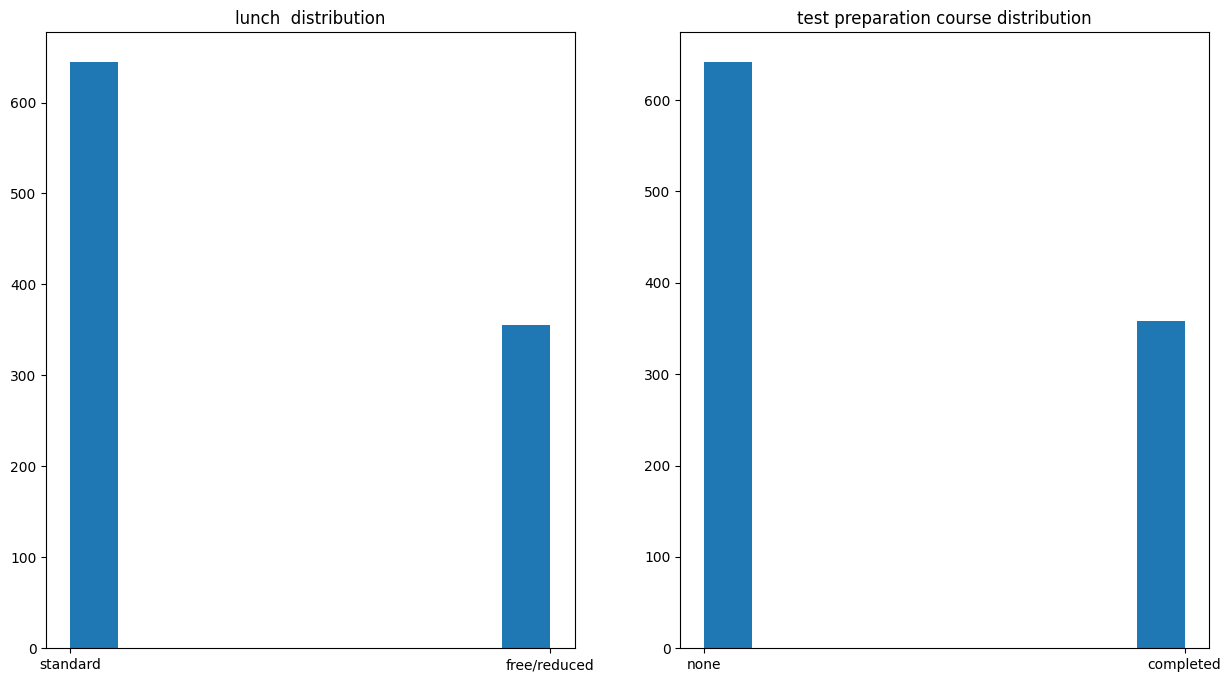

In [83]:
fig, axs = plt.subplots(1,2,figsize=(15, 8))

axs[0].hist(student_df['lunch'])
axs[0].set_title('lunch  distribution')

axs[1].hist(student_df['test preparation course'])
axs[1].set_title('test preparation course distribution')

plt.show()

In [84]:
#combien de menmbre dans le sex
student_df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [85]:
#combien de membre dans chaque groupe
student_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [86]:
#combien de menbre dans chaque niveau des étude des parents
student_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [87]:
#combien de personne qui paie la contine ou non
student_df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [88]:
#combien de person qui prepare les cours ou non
student_df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [89]:
# Obtenez les valeurs uniques de la colonne 'preparation course'
completed_none = student_df['test preparation course'].unique()

# Créez un mapping pour les valeurs uniques de 'preparation course'
completed_none_map = {'completed': 1, 'none': 0}

# Itérez sur les colonnes de type 'object'
for column in student_df.select_dtypes(include='object'):
      # Vérifiez si les valeurs uniques de la colonne sont les mêmes que celles de 'preparation course'
    if (student_df[column].unique().all() == completed_none.all()):
              # Appliquez le mapping à la colonne
        student_df[column] = [completed_none_map[value] for value in student_df[column]]

In [90]:
# Obtenez les valeurs uniques de la colonne 'lunch'
lunch_unique_values = student_df['lunch'].unique()

# Créez un mapping pour les valeurs uniques de 'lunch'
lunch_map = {'standard': 1, 'free/reduced': 0}

# Itérez sur les colonnes de type 'object'
for column in student_df.select_dtypes(include='object'):
    # Vérifiez si les valeurs uniques de la colonne sont les mêmes que celles de 'lunch'
    if (student_df[column].unique().all() == lunch_unique_values.all()):
        # Appliquez le mapping à la colonne
        student_df[column] = student_df[column].map(lunch_map)

In [91]:
#changer male par 1 et female par 0
sex_map = {'male': 1, 'female': 0}

# Utiliser la méthode map pour appliquer le mapping
student_df['gender'] = student_df['gender'].map(sex_map)


In [92]:
race = {
    "group A":0,
    "group B":1,
    "group C":2,
    "group D":3,
    "group E":4
}

In [93]:
student_df['race/ethnicity']=student_df['race/ethnicity'].map(race)

In [94]:
level = {
    "bachelor's degree":0,
    "some college":1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5,
}

In [95]:
student_df['parental level of education']=student_df['parental level of education'].map(level)

In [96]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,0,1,0,72,72,74
1,0,2,1,1,1,69,90,88
2,0,1,2,1,0,90,95,93
3,1,0,3,0,0,47,57,44
4,1,2,1,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95
996,1,2,4,0,0,62,55,55
997,0,2,4,0,1,59,71,65
998,0,3,1,1,1,68,78,77


In [97]:
#les types de chaque colonne modifié
student_df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

In [98]:
#info sur la data
student_df.info

<bound method DataFrame.info of      gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            0      1   
1         0               2                            1      1   
2         0               1                            2      1   
3         1               0                            3      0   
4         1               2                            1      1   
..      ...             ...                          ...    ...   
995       0               4                            2      1   
996       1               2                            4      0   
997       0               2                            4      0   
998       0               3                            1      1   
999       0               3                            1      0   

     test preparation course  math score  reading score  writing score  
0                          0          72             72             74  
1                

In [99]:
#une discribtion sur la data
student_df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.689000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.686156,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,3.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [100]:
# Utilisation de groupby pour regrouper le DataFrame par la colonne 'parental level of education'
# Ensuite, on compte le nombre d'occurrences de chaque valeur dans la colonne 'math score' pour chaque groupe
# La méthode value_counts() renvoie une série qui compte le nombre d'occurrences de chaque valeur
student_df.groupby('parental level of education')['math score'].value_counts()

parental level of education  math score
0                            63            5
                             65            5
                             66            5
                             59            4
                             61            4
                                          ..
5                            46            1
                             52            1
                             54            1
                             87            1
                             97            1
Name: math score, Length: 334, dtype: int64

In [101]:
# Utilisation de groupby pour regrouper le DataFrame par la colonne 'parental level of education'
# Ensuite, on compte le nombre d'occurrences de chaque valeur dans la colonne 'reading score' pour chaque groupe
# La méthode value_counts() renvoie une série qui compte le nombre d'occurrences de chaque valeur
student_df.groupby('parental level of education')['reading score'].value_counts()

parental level of education  reading score
0                            100              8
                             72               7
                             58               5
                             73               5
                             74               5
                                             ..
5                            47               1
                             57               1
                             89               1
                             91               1
                             97               1
Name: reading score, Length: 312, dtype: int64

In [102]:
# Utilisation de groupby pour regrouper le DataFrame par la colonne 'parental level of education'
# Ensuite, on compte le nombre d'occurrences de chaque valeur dans la colonne 'writing score' pour chaque groupe
# La méthode value_counts() renvoie une série qui compte le nombre d'occurrences de chaque valeur
student_df.groupby('parental level of education')['writing score'].value_counts()

parental level of education  writing score
0                            81               7
                             100              7
                             62               6
                             74               6
                             70               5
                                             ..
5                            92               1
                             93               1
                             96               1
                             97               1
                             100              1
Name: writing score, Length: 324, dtype: int64

In [103]:
student_df.groupby('parental level of education')['math score'].mean()

parental level of education
0    69.389831
1    67.128319
2    69.745763
3    67.882883
4    62.137755
5    63.497207
Name: math score, dtype: float64

In [104]:
student_df.groupby('parental level of education')['reading score'].mean()

parental level of education
0    73.000000
1    69.460177
2    75.372881
3    70.927928
4    64.704082
5    66.938547
Name: reading score, dtype: float64

In [105]:
student_df.groupby('parental level of education')['writing score'].mean()

parental level of education
0    73.381356
1    68.840708
2    75.677966
3    69.896396
4    62.448980
5    64.888268
Name: writing score, dtype: float64

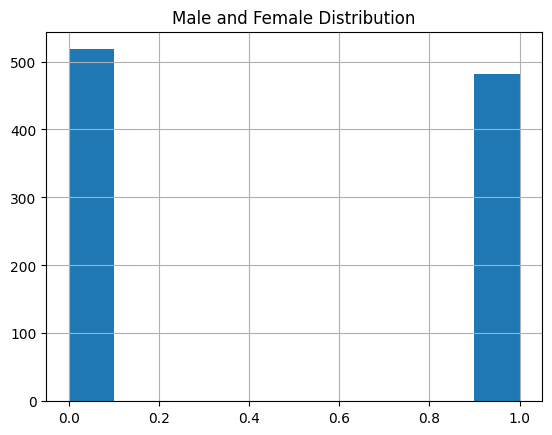

In [106]:
 # Utilisation de la méthode hist() pour créer un histogramme de la distribution des valeurs dans la colonne 'gender'
student_df['gender'].hist() #1 male; 0 female
# Ajout d'un titre au graphique
plt.title("Male and Female Distribution")
plt.show()

In [107]:
#comparaison entre 1 male et 0 female parrapport au math score
student_df.groupby('gender')['math score'].mean()

gender
0    63.633205
1    68.728216
Name: math score, dtype: float64

In [108]:
#comparaison entre 1 male et 0 female parrapport au reading score
student_df.groupby('gender')['reading score'].mean()

gender
0    72.608108
1    65.473029
Name: reading score, dtype: float64

In [109]:
##comparaison entre 1 male et 0 female parrapport au writing score
student_df.groupby('gender')['writing score'].mean()

gender
0    72.467181
1    63.311203
Name: writing score, dtype: float64


**Analyse Exploratoire des Données (EDA)**







In [110]:
# Créer un histogramme avec Plotly Express
# x spécifie la variable à afficher sur l'axe des x (dans ce cas, "gender")
# color spécifie la variable à utiliser pour la coloration des barres (dans ce cas, "gender")
# width et height définissent la largeur et la hauteur de la figure
# title définit le titre du graphique
fig = px.histogram(student_df, x="gender", color="gender", width=800, height=500, title="Frequency Distribution of Gender")
fig.show()

In [111]:
fig = px.histogram(student_df, x="race/ethnicity", color="race/ethnicity", width=800, height=500, title="Frequency Distribution of race/ethnicity")
fig.show()

In [112]:
fig = px.histogram(student_df, x='parental level of education', color='parental level of education', width=800, height=500, title='Frequency Distribution of parental level of education')
fig.show()

In [113]:
fig = px.histogram(student_df, x='lunch', color='lunch', width=800, height=500, title='Frequency Distribution of lunch')
fig.show()

In [114]:
fig = px.histogram(student_df, x='test preparation course', color='test preparation course', width=800, height=500, title='Frequency Distribution of test preparation course')
fig.show()

 **Distribution du nombre dans les colonnes numériques**

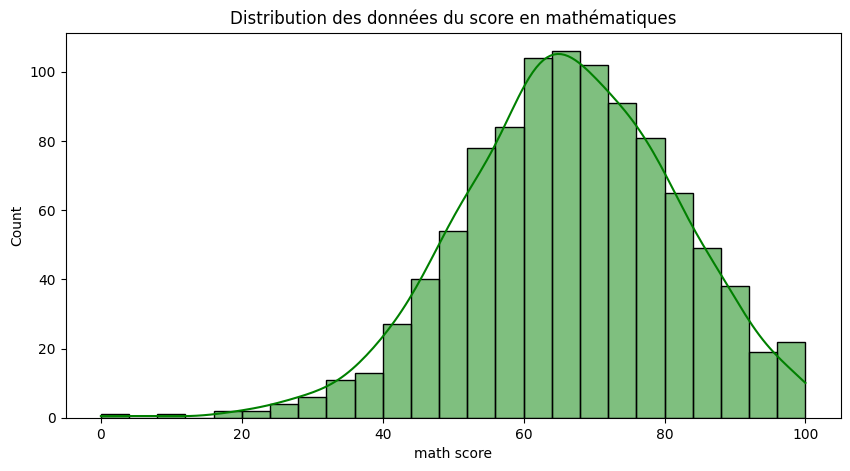

In [115]:
# Créer une figure avec une taille de 10x5 pouces
plt.figure(figsize=(10, 5))

# Tracer un histogramme pour la colonne "math score" du DataFrame student_df
# Utiliser seaborn (sns) pour le tracé
# x spécifie la colonne sur l'axe des x, color définit la couleur de l'histogramme, kde active l'estimation de la densité
sns.histplot(student_df, x="math score", color="Green", kde=True)

# Ajouter un titre au graphique
plt.title("Distribution des données du score en mathématiques")

# Afficher le graphique
plt.show()

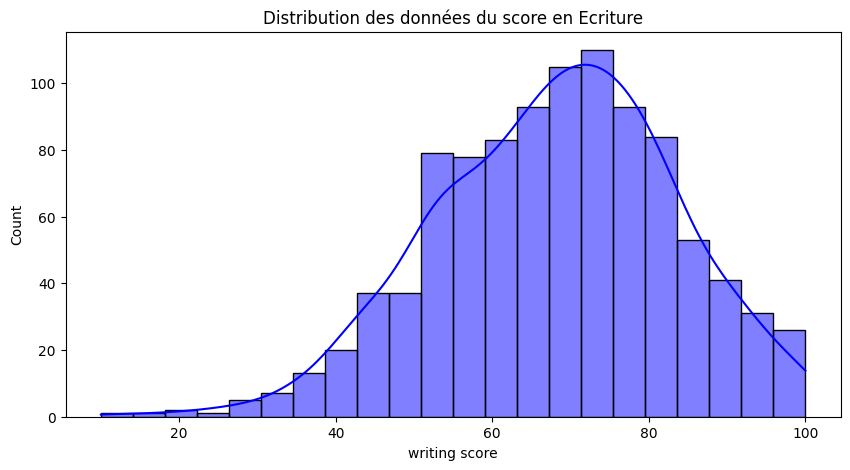

In [116]:
# Créer une figure avec une taille de 10x5 pouces
plt.figure(figsize=(10, 5))

# Tracer un histogramme pour la colonne "writing score" du DataFrame student_df
# Utiliser seaborn (sns) pour le tracé
# x spécifie la colonne sur l'axe des x, color définit la couleur de l'histogramme, kde active l'estimation de la densité
sns.histplot(student_df, x="writing score", color="blue", kde=True)

# Ajouter un titre au graphique
plt.title("Distribution des données du score en Ecriture")

# Afficher le graphique
plt.show()

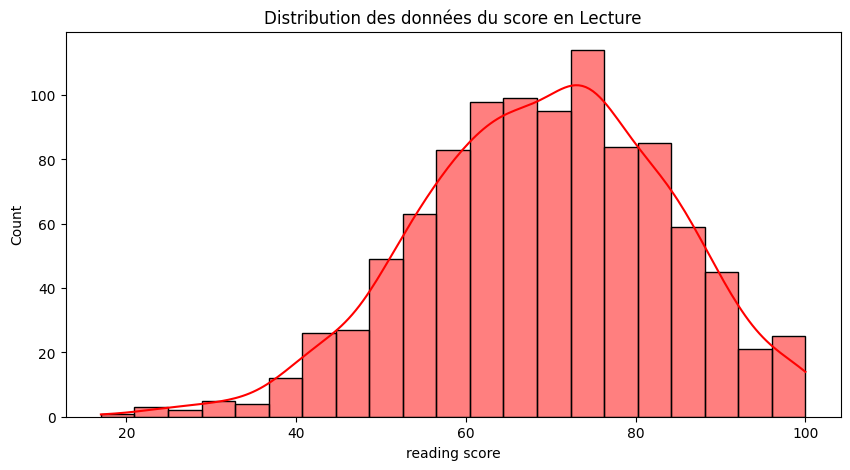

In [117]:
# Créer une figure avec une taille de 10x5 pouces
plt.figure(figsize=(10, 5))

# Tracer un histogramme pour la colonne "reading score" du DataFrame student_df
# Utiliser seaborn (sns) pour le tracé
# x spécifie la colonne sur l'axe des x, color définit la couleur de l'histogramme, kde active l'estimation de la densité
sns.histplot(student_df, x="reading score", color="red", kde=True)

# Ajouter un titre au graphique
plt.title("Distribution des données du score en Lecture")

# Afficher le graphique
plt.show()

**Analyse bivariée, nous comparons deux caractéristiques entre elles.**








In [118]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau d'éducation  sur les scores en mathématiques, en tenant compte du genre
fig = px.violin(student_df, x="parental level of education", y="math score", color="gender", box=True, title="Impact of Education Level on Math Score considering Gender")
fig.show()

In [119]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau d'éducation  sur les scores en ECRITURE, en tenant compte du genre
fig = px.violin(student_df, x="parental level of education", y="writing score", color="gender", box=True, title="Impact of Education Level on Writing Score considering Gender")
fig.show()

In [120]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau d'éducation  sur les scores en LECTURE, en tenant compte du genre
fig = px.violin(student_df, x="parental level of education", y="reading score", color="gender", box=True, title="Impact of Education Level on Reading Score considering Gender")
fig.show()

In [121]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de prepartion des cours de  sur les scores en mathématiques, en tenant compte du genre
fig = px.violin(student_df, x="test preparation course", y="math score", color="gender", box=True, title="Impact of Education Level on Math Score considering Gender")
fig.show()

In [122]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de prepartion des cours  sur les scores en ECRITURE, en tenant compte du genre
fig = px.violin(student_df, x="test preparation course", y="writing score", color="gender", box=True, title="Impact of Education Level on writing Score considering Gender")
fig.show()

In [123]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de prepartion des cours sur les scores en LECTURE, en tenant compte du genre
fig = px.violin(student_df, x="test preparation course", y="reading score", color="gender", box=True, title="Impact of Education Level on Reading Score considering Gender")
fig.show()

In [124]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de dejenner  sur les scores en mathématiques, en tenant compte du genre
fig = px.violin(student_df, x="lunch", y="math score", color="gender", box=True, title="Impact of Education Level on math Score considering Gender")
fig.show()

In [125]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de dejenner  sur les scores en ECRITURE, en tenant compte du genre
fig = px.violin(student_df, x="lunch", y="writing score", color="gender", box=True, title="Impact of Education Level on writing Score considering Gender")
fig.show()

In [126]:
# Création d'un graphique en violon
# Visualisation de l'impact du niveau de dejenner sur les scores en LECTURE, en tenant compte du genre
fig = px.violin(student_df, x="lunch", y="reading score", color="gender", box=True, title="Impact of Education Level on Reading Score considering Gender")
fig.show()

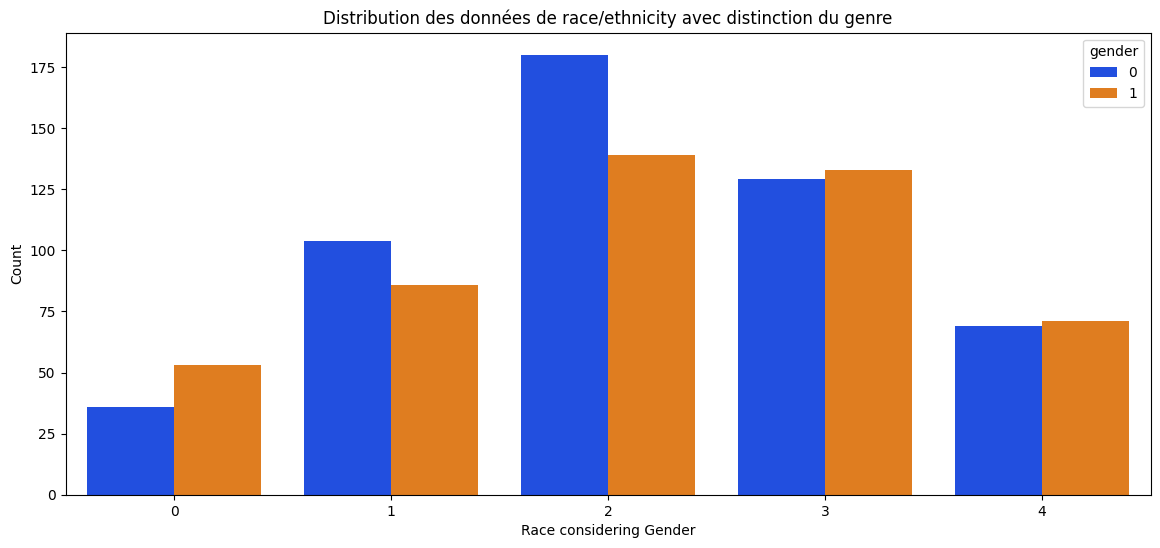

In [127]:
# Créer une figure avec une taille de 14x6 pouces
plt.figure(figsize=(14, 6))

# Tracer un countplot pour la distribution des données de race/ethnicity avec la distinction du genre
# Utiliser seaborn (sns) pour le tracé
# x spécifie la colonne "race/ethnicity_encoded" sur l'axe des x, hue divise les barres en fonction de la colonne "gender", palette définit la palette de couleurs
sns.countplot(x=student_df["race/ethnicity"], hue=student_df["gender"], palette="bright")

# Ajouter un titre au graphique
plt.title("Distribution des données de race/ethnicity avec distinction du genre")

# Ajouter des étiquettes d'axe
plt.xlabel("Race considering Gender")
plt.ylabel("Count")

# Afficher le graphique
plt.show()

In [128]:
#Création de la colonne 'average_score'
# En calculant la moyenne des scores en mathématiques, lecture et écriture
student_df['average_score'] = student_df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [129]:
# Définition des seuils pour déterminer le niveau
seuil_eleve = 70  # Remplacez par le seuil approprié
seuil_moyen = 50  # Remplacez par le seuil approprié

In [130]:
# Définition des conditions pour chaque niveau
conditions = [
    (student_df['average_score'] >= seuil_eleve),
    (student_df['average_score'] >= seuil_moyen) & (student_df['average_score'] < seuil_eleve),
    (student_df['average_score'] < seuil_moyen)
]

In [131]:
import sklearn.model_selection
# Définition des labels correspondants à chaque condition
choices = ['élevé', 'moyen', 'faible']
# Création de la colonne 'niveau' basée sur les conditions
student_df['niveau'] = np.select(conditions, choices)

In [132]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,niveau
0,0,1,0,1,0,72,72,74,72.666667,élevé
1,0,2,1,1,1,69,90,88,82.333333,élevé
2,0,1,2,1,0,90,95,93,92.666667,élevé
3,1,0,3,0,0,47,57,44,49.333333,faible
4,1,2,1,1,0,76,78,75,76.333333,élevé
...,...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,94.000000,élevé
996,1,2,4,0,0,62,55,55,57.333333,moyen
997,0,2,4,0,1,59,71,65,65.000000,moyen
998,0,3,1,1,1,68,78,77,74.333333,élevé


In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [146]:
import numpy as np
from sklearn import preprocessing
# Sélection des caractéristiques (X) et de la variable cible (y)
X = student_df.drop(['niveau'], axis=1)
y = student_df['niveau']
# Division des données en ensembles d'entraînement et de test
# X représente les caractéristiques (features), y représente les variable cible (target)
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(student_df.drop('niveau', axis=1), student_df['niveau'], test_size=0.2, random_state=42)

print(student_df.head())  # Vérifiez les premières lignes du DataFrame
print(student_df['niveau'].unique())  # Vérifiez les valeurs uniques dans la colonne 'niveau'


# Convertir les données d'entraînement et de test en tableaux NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Créer une instance de LabelEncoder Le LabelEncoder est utilisé pour convertir des étiquettes de texte en nombres, ce qui est souvent nécessaire pour les algorithmes d'apprentissage automatique
label_encoder = preprocessing.LabelEncoder()

# Créer une instance de LabelEncoder
label_encoder.fit(y_train)

# Transformer les étiquettes d'entraînement en nombres encodés
y_train_encoded = label_encoder.transform(y_train)
print (y_train_encoded)

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            0      1   
1       0               2                            1      1   
2       0               1                            2      1   
3       1               0                            3      0   
4       1               2                            1      1   

   test preparation course  math score  reading score  writing score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   average_score  niveau  
0      72.666667   élevé  
1      82.333333   élevé  
2      92.666667   élevé  
3      49.333333  faible  
4      76.333333   élevé  
['élevé' 'faib

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle avec régularisation
model_regularized = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42)

# Entraîner le modèle
model_regularized.fit(X_train, y_train)

# Faire des prédictions
y_pred_regularized = model_regularized.predict(X_test)

# Calculer la précision
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)

print(f"Précision avec régularisation : {accuracy_regularized}")


Précision avec régularisation : 1.0


In [136]:
from sklearn.ensemble import RandomForestClassifier
#creation d'une intance du modele RandomForestClassifier
model=RandomForestClassifier()
# Entraînement du modèle
model.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy}')

Précision du modèle : 1.0


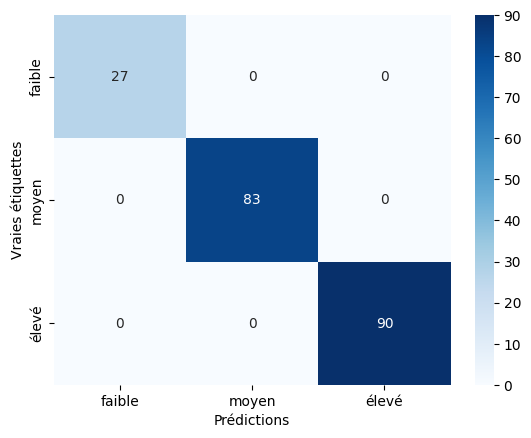

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['faible', 'moyen','élevé'], yticklabels=['faible', 'moyen','élevé'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


In [142]:
from joblib import dump, load

# Sauvegarder le modèle avec le protocole par défaut
dump(model, "model.joblib")

# Charger le modèle en spécifiant le protocole
loaded_model = load("model.joblib")


In [153]:
print(student_df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'niveau'],
      dtype='object')
